In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
cc = pd.read_csv("creditcard.csv")

In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
cc['Class'] = cc['Class'].astype('bool')

In [15]:
train, test = train_test_split(cc, test_size=0.2, random_state=42)

In [19]:
feat_cols = cc.drop(['Class'], axis=1).columns

In [20]:
vanilla = linear_model.LogisticRegression(C=10000000000000)
X_train = train[feat_cols]
Y_train = train['Class']
vanilla.fit(X_train, Y_train)

LogisticRegression(C=10000000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
X_test = test[feat_cols]
Y_test = test['Class']

In [27]:
Y_pred = vanilla.predict(X_test)

In [29]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

In [30]:
print(tn, fp)
print(fn, tp)
# want to minimize false negatives

56853 11
46 52


In [58]:
vanilla.predict_proba(X_test)

array([[  1.72553356e-06,   9.99998274e-01],
       [  9.99462428e-01,   5.37572434e-04],
       [  9.98462776e-01,   1.53722417e-03],
       ..., 
       [  9.95714688e-01,   4.28531175e-03],
       [  9.99819584e-01,   1.80415794e-04],
       [  9.99807677e-01,   1.92322974e-04]])

In [66]:
Y_score = vanilla.predict_proba(X_test)

In [69]:
Y_score

array([[  1.72553356e-06,   9.99998274e-01],
       [  9.99462428e-01,   5.37572434e-04],
       [  9.98462776e-01,   1.53722417e-03],
       ..., 
       [  9.95714688e-01,   4.28531175e-03],
       [  9.99819584e-01,   1.80415794e-04],
       [  9.99807677e-01,   1.92322974e-04]])

In [68]:
Y_score[:, 1]

array([  9.99998274e-01,   5.37572434e-04,   1.53722417e-03, ...,
         4.28531175e-03,   1.80415794e-04,   1.92322974e-04])

In [70]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = [None, None]
for i in range(2):
    fpr[i], tpr[i], thresholds[i] = roc_curve(Y_test, Y_score[:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [79]:
roc_df = pd.DataFrame({"fpr": fpr[1], "tpr": tpr[1], "thres": thresholds[1]})

In [88]:
triples = roc_df.apply(lambda x: (x["fpr"], x["tpr"], x["thres"]), axis=1)

In [74]:
fpr[1]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.75858188e-05,   1.75858188e-05,
         7.03432752e-05,   7.03432752e-05,   1.05514913e-04,
         1.05514913e-04,   1.23100732e-04,   1.23100732e-04,
         1.40686550e-04,   1.40686550e-04,   1.58272369e-04,
         1.58272369e-04,   1.75858188e-04,   1.75858188e-04,
         1.93444007e-04,   1.93444007e-04,   2.11029826e-04,
         2.11029826e-04,   2.28615644e-04,   2.28615644e-04,
         2.46201463e-04,   2.46201463e-04,   3.16544738e-04,
         3.16544738e-04,   3.69302195e-04,   3.69302195e-04,
         3.86888014e-04,   3.86888014e-04,   4.57231289e-04,
         4.57231289e-04,   4.74817107e-04,   4.74817107e-04,
         5.09988745e-04,   5.09988745e-04,   5.27574564e-04,
         5.27574564e-04,   5.62746201e-04,   5.62746201e-04,
         5.80332020e-04,   5.80332020e-04,   7.21018571e-04,
         7.21018571e-04,   8.96876759e-04,   8.96876759e-04,
         1.40686550e-03,

In [75]:
thresholds[1]

array([  9.99999999e-01,   9.99999840e-01,   9.99999804e-01,
         9.99999654e-01,   9.99999513e-01,   9.99998274e-01,
         9.99929090e-01,   9.99818980e-01,   9.99479523e-01,
         9.98847093e-01,   9.98754819e-01,   9.97987098e-01,
         9.97802610e-01,   9.72175067e-01,   9.62649025e-01,
         7.43712986e-01,   6.41699166e-01,   5.90774209e-01,
         5.69761108e-01,   5.49377884e-01,   4.81987074e-01,
         4.48150810e-01,   4.47802750e-01,   4.39957553e-01,
         4.28684051e-01,   3.54486890e-01,   2.48790117e-01,
         2.47189231e-01,   2.40483161e-01,   2.38781235e-01,
         2.29658812e-01,   1.79493664e-01,   1.48438887e-01,
         1.46037545e-01,   1.37086636e-01,   1.36444486e-01,
         1.29272830e-01,   1.27600189e-01,   1.27342929e-01,
         1.23466730e-01,   1.17547386e-01,   1.16979035e-01,
         1.14998267e-01,   1.08202053e-01,   9.06168417e-02,
         8.93101896e-02,   7.66086983e-02,   7.60925116e-02,
         5.42700277e-02,

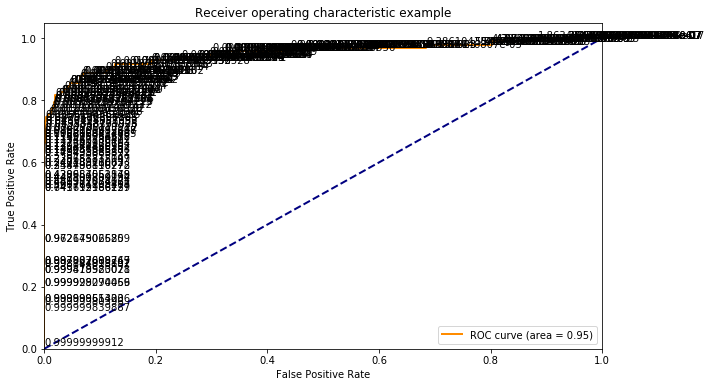

In [93]:
fig = plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

ax = fig.add_subplot(111)
timing = 0
for x, y, thres in triples:
    if timing % 10 == 0:
        ax.annotate(thres, xy=(x, y))
    timing += 1

plt.show()